<a href="https://colab.research.google.com/github/infernoman16/DL_practice/blob/main/cancer_classif_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/infernoman16/learn101/main/cancer_classification.csv?token=AJKWGQPH26GN7V3WQJZLFLK72MTBM'
df=pd.read_csv(url)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


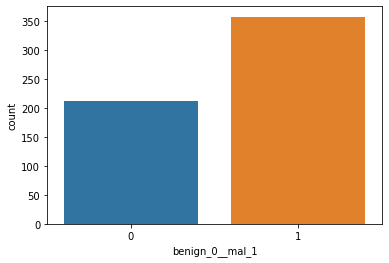

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

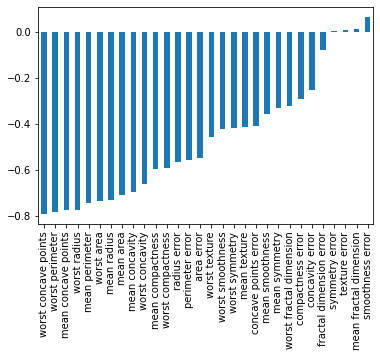

In [13]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

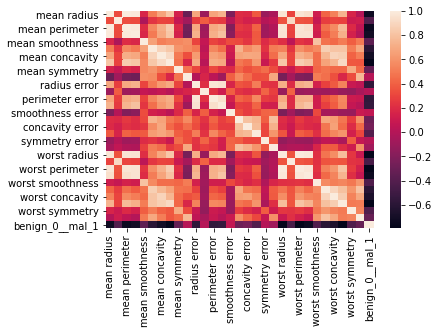

In [14]:
sns.heatmap(df.corr())

In [15]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler()

In [20]:
X_train=scaler.fit_transform(X_train)

In [21]:
X_test=scaler.transform(X_test)

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.layers import Dense,Dropout

In [26]:
model= Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))#binary classification so sigmoid

model.compile(loss='binary_crossentropy',optimizer='adam')

In [27]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6982 - val_loss: 0.6715
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6533 - val_loss: 0.6334
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6110 - val_loss: 0.5921
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5624 - val_loss: 0.5456
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5130 - val_loss: 0.4939
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4606 - val_loss: 0.4396
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4123 - val_loss: 0.3882
Epoch 8/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3591 - val_loss: 0.3362
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3162 - val_loss: 0.2944
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.2804 - val_loss: 0.2627
Epoch 11

In [28]:
losses=pd.DataFrame(model.history.history)

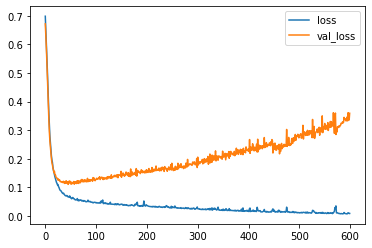

In [32]:

losses.plot() #overfitting

In [33]:
model= Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))#binary classification so sigmoid

model.compile(loss='binary_crossentropy',optimizer='adam')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 |        to qualify as an improvement, i.e. an absolute
 |        change of less than min_delta, will count as no
 |        improvem

In [36]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [37]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7034 - val_loss: 0.6784
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6614 - val_loss: 0.6470
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6245 - val_loss: 0.6066
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5803 - val_loss: 0.5607
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5340 - val_loss: 0.5113
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4835 - val_loss: 0.4592
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4336 - val_loss: 0.4087
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3873 - val_loss: 0.3603
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3452 - val_loss: 0.3186
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3088 - val_loss: 0.2842
Epoch 11/

In [38]:
model_loss=pd.DataFrame(model.history.history)

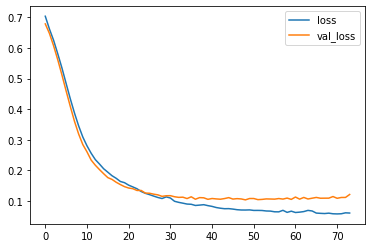

In [40]:
model_loss.plot() #less OF due to early stop

In [41]:
model= Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))#binary classification so sigmoid

model.compile(loss='binary_crossentropy',optimizer='adam')

In [42]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.7145 - val_loss: 0.6754
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6956 - val_loss: 0.6615
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6773 - val_loss: 0.6440
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6575 - val_loss: 0.6266
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6388 - val_loss: 0.6054
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6181 - val_loss: 0.5776
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5807 - val_loss: 0.5466
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5748 - val_loss: 0.5143
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5556 - val_loss: 0.4829
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5240 - val_loss: 0.4437
Epoch 11/

In [43]:
model_loss=pd.DataFrame(model.history.history)

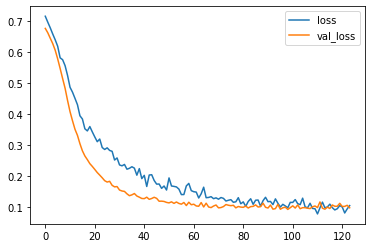

In [44]:
model_loss.plot()

In [46]:
preds=model.predict_classes(X_test)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [49]:
print(confusion_matrix(y_test,preds))

[[54  1]
 [ 3 85]]
